In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel('Dhaka Rent.xlsx')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

Text(0.5, 1.0, 'Rent over Area')

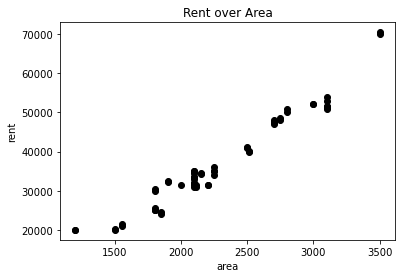

In [4]:
#scatter plot
plt.scatter(df.area,df.rent,color='black')
plt.xlabel('area')
plt.ylabel('rent')
plt.title('Rent over Area')

In [5]:
# x=df[['area']]
x=df.drop('rent',axis=1)
y=df[['rent']]
x

,area
0,2000
1,2100
2,2500
3,2250
4,3000
5,1900
6,1500
7,1850
8,2700
9,2100


# Separate x,y

In [6]:
from sklearn.model_selection import train_test_split


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=1)
xtrain.head()



,area
36,1500
21,2100
10,2150
52,3500
19,2700


In [20]:
xtrain.shape

(45, 1)

In [21]:
ytrain.shape

(45, 1)

In [22]:
xtest.shape

(15, 1)

In [24]:
ytest.shape


(15, 1)

In [8]:
ytrain.head()

,rent
45,51000
50,31000
56,48500
19,47000
24,50000


In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [10]:
m=lr.coef_
m

array([[20.58365985]])

In [11]:
c=lr.intercept_
c

array([-9703.20718312])

In [12]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [13]:
yp=(m*2000)+c
yp

array([[31464.11251323]])

In [14]:
yp=lr.predict([[2000]])
yp

array([[31464.11251323]])

In [15]:
df['Predicted_rent']=lr.predict(x)
df.head()

,area,rent,Predicted_rent
0,2000,31500,31464.112513
1,2100,35000,33522.478498
2,2500,41050,41755.942437
3,2250,36100,36610.027475
4,3000,52100,52047.772361


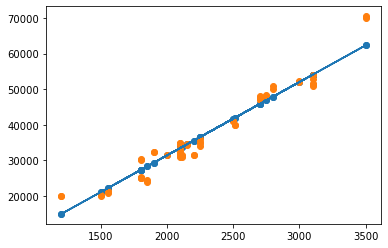

In [16]:
plt.plot(df.area,df.Predicted_rent)
plt.scatter(df.area,df.Predicted_rent)
plt.scatter(x,y)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(ytest,lr.predict(xtest))
mae
msc=mean_squared_error(ytest,lr.predict(xtest))
msc

11152631.730074117

In [18]:
lr.score(xtest,ytest)

0.9230932245846737

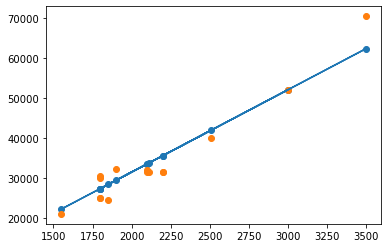

In [19]:
# plt.plot(xtest,lr.predict(xtest))
plt.scatter(xtest,lr.predict(xtest))
# plt.scatter(xtest,ytest)
import matplotlib.pyplot as plt

plt.plot(xtest, lr.predict(xtest))

plt.scatter(xtest, ytest)
plt.show()


# save AI model

In [ ]:
import pickle
pickle.dump(lr,open('my_lr','wb'))#write binary


# how to open this file another system

In [ ]:
import pickle 
reg=pickle.load(open('my_lr','rb'))
reg.predict([[2000]])

# another way to save

In [31]:
import joblib as jb
jb.dump(lr,'my_lr2')


['my_lr2']

In [32]:
reg2=jb.load('my_lr2')


In [34]:
reg2

LinearRegression()

In [35]:
reg2.predict([[2000]])

array([[31464.11251323]])